In [1]:
import numpy as np
from FML.Regresion.prep import FL
from FML.Regresion.Linear import LR
from FML.Regresion.Ridge import RR
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from FML.Regresion.Lasso import LaR
import matplotlib.pyplot as plt
trainfile = 'train.csv'
testfile = 'test.csv'
validfile = 'validation.csv'
data_prep = FL('1.csv',)
#data_prep.prep('quality')
LR_train = LR(trainfile)
LR_train.formulate(11)
LR_train.cal_beta()
LR_train.test(testfile)
RR_train = RR(trainfile)
RR_train.formulate(11)
lamda = 0
RR_train.cal_beta(lamda)
rec = RR_train.test(validfile)
lambda_list = []
lambda_val = []
for i in np.arange(0,0.5,0.01):
    lambda_list.append(RR_train.cal_beta(i).tolist())
    lambda_val.append(i)
    temp = RR_train.test(validfile)
    if temp < rec:
        rec = temp
        lamda = i
RR_train.cal_beta(lamda)
print('Lambda = {}'.format(lamda))
rec = RR_train.test(testfile)
print('MSE = {}'.format(rec))

Lambda = 0.1
MSE = 0.4285384016652761


In [2]:
for i,k in enumerate(lambda_list):
    for j,p in enumerate(k):
        lambda_list[i][j] = lambda_list[i][j][0]
lambda_list=np.matrix(lambda_list).transpose()
lambda_list = lambda_list.tolist()

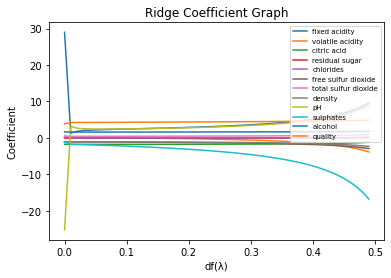

In [3]:
llabel = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
plt.figure(0)
for i in range(0,len(lambda_list)):
    plt.plot(lambda_val,lambda_list[i], label=llabel[i])
plt.ylabel('Coefficient')
plt.xlabel('df(λ)')
plt.title('Ridge Coefficient Graph')
plt.legend(loc=1,prop={'size': 7})

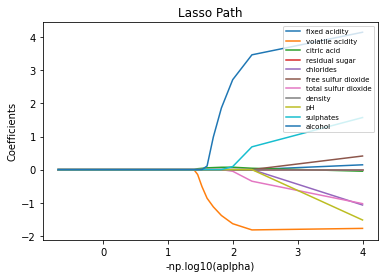

In [4]:
LassR = LaR(trainfile)
LassR.formulate(11)
LassR.lasso_train(validfile,np.arange(1e-4,5,0.005))
plt.figure(1)
plt.plot(-np.log10(LassR.alpha), LassR.beta)
plt.xlabel('-np.log10(aplpha)')
plt.ylabel('Coefficients')
plt.title('Lasso Path')
plt.legend(llabel,loc=1,prop={'size': 7})

In [6]:
LassR.test(testfile)

0.4323557947702453